In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import *
from scipy.fft import fft, fftfreq
import numpy as np
from scipy.signal import find_peaks

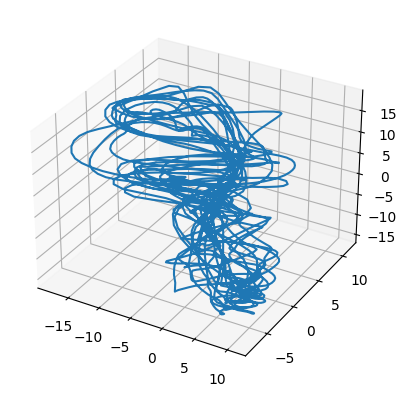

In [2]:
gyro = pd.read_csv("data/android.sensor.gyroscope.csv")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(gyro.iloc[:,1],gyro.iloc[:,2],gyro.iloc[:,3])
plt.show()

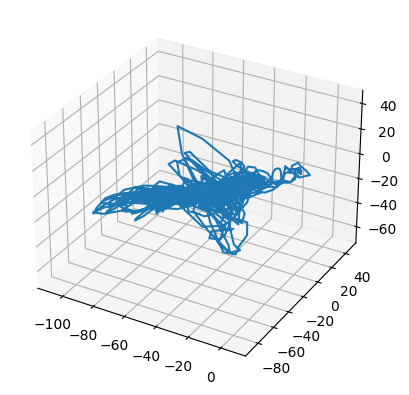

In [3]:
accel = pd.read_csv("data/android.sensor.accelerometer.csv")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(accel.iloc[:,1],accel.iloc[:,2],accel.iloc[:,3])
plt.show()

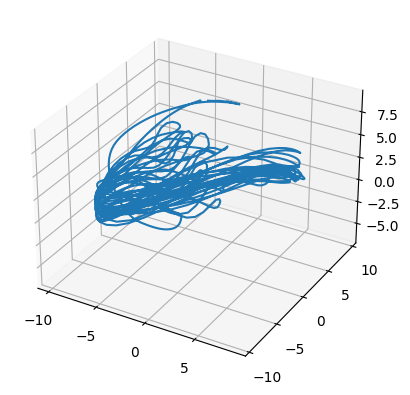

In [4]:
gravity = pd.read_csv("data/android.sensor.gravity.csv")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(gravity.iloc[:,1],gravity.iloc[:,2],gravity.iloc[:,3])
plt.show()

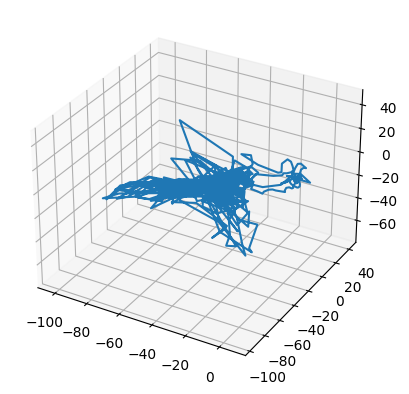

In [5]:
linear = pd.read_csv("data/android.sensor.linear_acceleration.csv")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(linear.iloc[:,1],linear.iloc[:,2],linear.iloc[:,3])
plt.show()

IndexError: single positional indexer is out-of-bounds

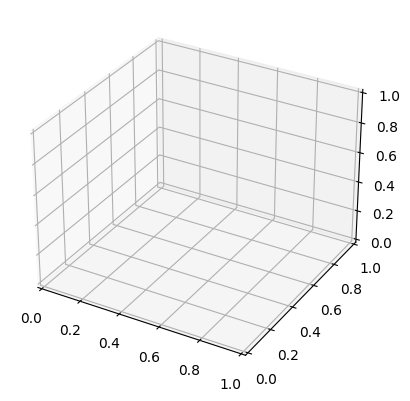

In [8]:
rotation = pd.read_csv("data/android.sensor.rotation_vector.csv")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(rotation.iloc[:,1],rotation.iloc[:,2],rotation.iloc[:,3])
plt.show()

In [9]:
gyro_delay = (gyro.iloc[-1,0] - gyro.iloc[0,0]) / gyro.iloc[:,0].count()
print("gyro:", gyro_delay / 1000000, "ms")
accel_delay = (accel.iloc[-1,0] - accel.iloc[0,0]) / accel.iloc[:,0].count()
print("accelerometer:", accel_delay / 1000000, "ms")
gravity_delay = (gravity.iloc[-1,0] - gravity.iloc[0,0]) / gravity.iloc[:,0].count()
print("gravity:", gravity_delay / 1000000, "ms")
linear_delay = (linear.iloc[-1,0] - linear.iloc[0,0]) / linear.iloc[:,0].count()
print("linear:", linear_delay / 1000000, "ms")
rotation_delay = (rotation.iloc[-1,0] - rotation.iloc[0,0]) / rotation.iloc[:,0].count()
print("rotation:", rotation_delay / 1000000, "ms")

gyro: 4.942829444300797 ms
accelerometer: 9.883563120704466 ms
gravity: 9.883533786395148 ms
linear: 19.75849962218371 ms


TypeError: unsupported operand type(s) for -: 'str' and 'str'

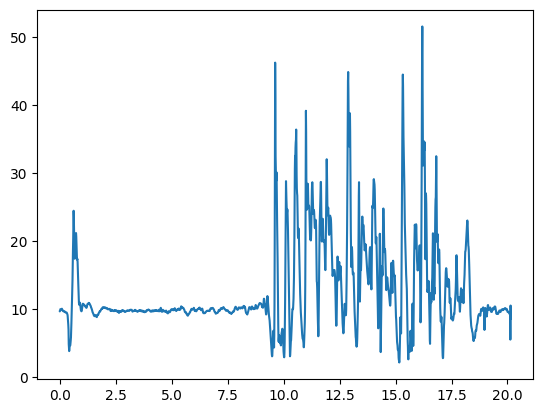

In [4]:
accel_length = []
accel_time = []
first = accel.iloc[0,0]
for i in range(accel.iloc[:,0].count()):
    length = sqrt(accel.iloc[i,1]**2 + accel.iloc[i,2]**2 + accel.iloc[i,3]**2)
    accel_length.append(length)
    accel_time.append((accel.iloc[i,0] - first)/1000000000)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(accel_time,accel_length)
plt.show()

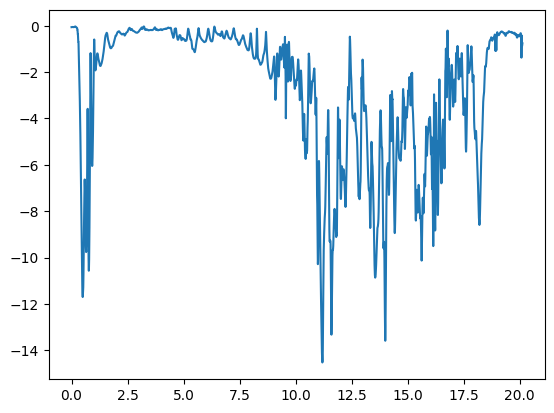

In [5]:
gyro_length = []
gyro_time = []
first = gyro.iloc[0,0]
for i in range(gyro.iloc[:,0].count()):
   # if ((gyro.iloc[i,0] - first)/1000000 ) < 5000:
    #    continue
    length = -1*sqrt(gyro.iloc[i,1]**2 + gyro.iloc[i,2]**2 + gyro.iloc[i,3]**2)
    gyro_length.append(length)
    gyro_time.append((gyro.iloc[i,0] - first)/1000000000)
    #if (gyro_time[-1] > 23000):
    #    break
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(gyro_time,gyro_length)
plt.show()

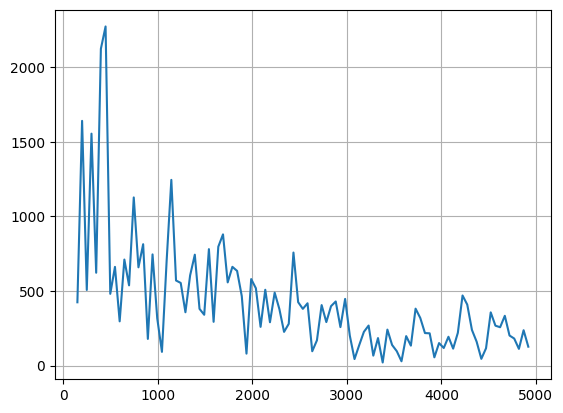

In [6]:
N = len(gyro_length)
yf = fft(gyro_length)[0:N//2]
T = gyro_time[-1] / N /1000
xf = fftfreq(N, T)[:N//2]
plt.plot(xf[3:100],np.abs(yf[3:100]))
plt.grid()
plt.show()

In [14]:
np.abs(yf[0:N//2])


array([5.04812490e+03, 3.76594781e+03, 1.91341714e+03, 1.93812700e+02,
       6.32553601e+02, 3.55101169e+02, 1.41589296e+02, 3.02970322e+02,
       1.28123567e+02, 4.60493601e+01, 1.14851921e+02, 2.52990662e+02,
       3.70786451e+02, 4.14817478e+02, 3.66775655e+02, 1.67472583e+02,
       1.25172985e+02, 1.78373930e+02, 2.59927405e+02, 3.85442381e+02,
       3.15266337e+02, 2.02716714e+02, 1.82029712e+02, 4.18074802e+02,
       5.10410668e+02, 4.50512232e+02, 2.49301853e+02, 1.79849655e+02,
       2.52721123e+02, 2.36228145e+02, 2.29732704e+02, 1.60985532e+02,
       7.55839313e+01, 9.26087676e+01, 1.42402466e+02, 1.69637893e+02,
       1.91547002e+02, 1.66029045e+02, 1.93938928e+02, 2.28526130e+02,
       2.67164239e+02, 2.11477544e+02, 1.29927951e+02, 1.09112049e+02,
       2.49681492e+01, 6.69068039e+01, 2.67182288e+01, 1.17633134e+02,
       1.65301598e+02, 1.92300723e+02, 1.72477727e+02, 6.69446122e+01,
       1.48047516e+02, 2.89732572e+02, 2.93764461e+02, 2.75021287e+02,
      

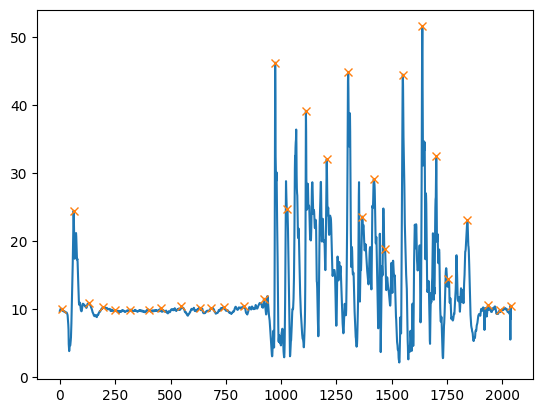

In [7]:
peaks, _ = find_peaks(accel_length,distance = 50)
plt.plot(accel_length)
plt.plot(peaks, np.array(accel_length)[peaks], "x")
plt.show()

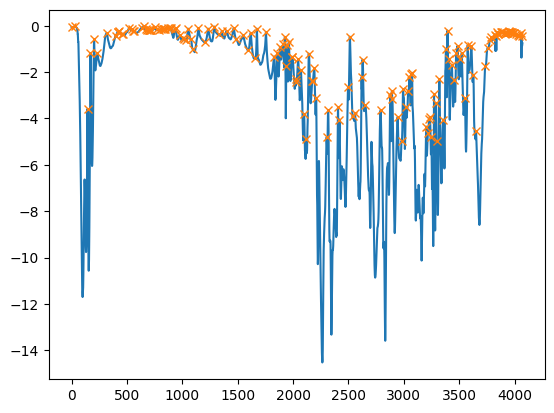

In [8]:
peaks, _ = find_peaks(gyro_length,height=-5)
plt.plot(gyro_length)
plt.plot(peaks, np.array(gyro_length)[peaks], "x")
plt.show()

In [9]:
min_sample = 1250
max_sample = 1500
min_seconds = accel_time[min_sample]
max_seconds = accel_time[max_sample]

sample_rate = 44100
beats = [441000,551250,573300,584325,882000]

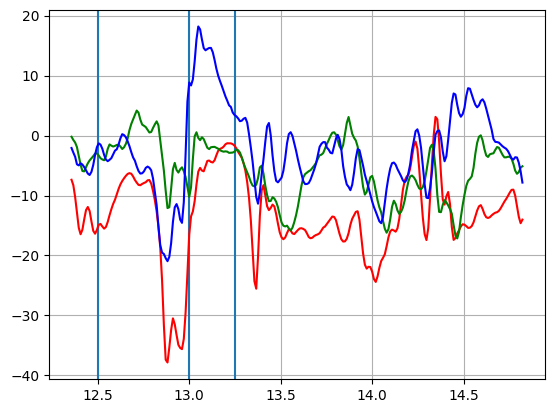

In [10]:
for x in beats:
    seconds = x / sample_rate
    if (min_seconds <= seconds <= max_seconds):
        plt.axvline(seconds)
plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,1],color = 'r')
plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,2],color = 'g')
plt.plot(accel_time[min_sample:max_sample],accel.iloc[min_sample:max_sample,3],color = 'b')
plt.grid(True)
plt.show()

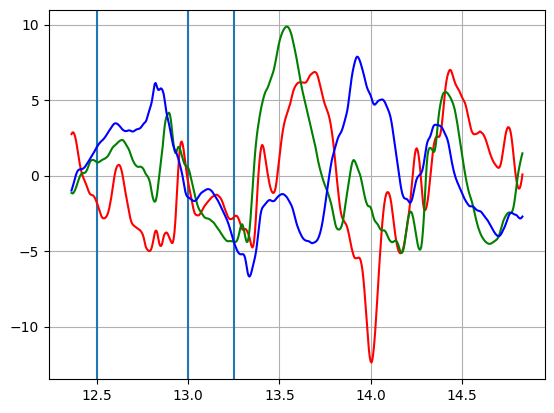

In [11]:
for x in beats:
    seconds = x / sample_rate
    if (min_seconds <= seconds <= max_seconds):
        plt.axvline(seconds)
plt.plot(gyro_time[min_sample*2:max_sample*2],gyro.iloc[min_sample*2:max_sample*2,1],color = 'r')
plt.plot(gyro_time[min_sample*2:max_sample*2],gyro.iloc[min_sample*2:max_sample*2,2],color = 'g')
plt.plot(gyro_time[min_sample*2:max_sample*2],gyro.iloc[min_sample*2:max_sample*2,3],color = 'b')
plt.grid(True)
plt.show()

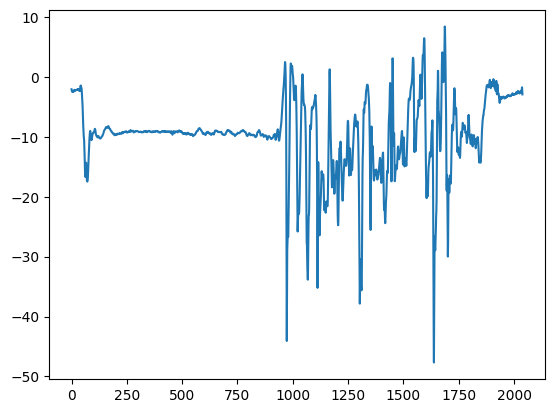

In [85]:
plt.plot(accel.iloc[:,1])
plt.show()